In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)


In [58]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table

Station = Base.classes.station
Measurement = Base.classes.measurement

In [60]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [62]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

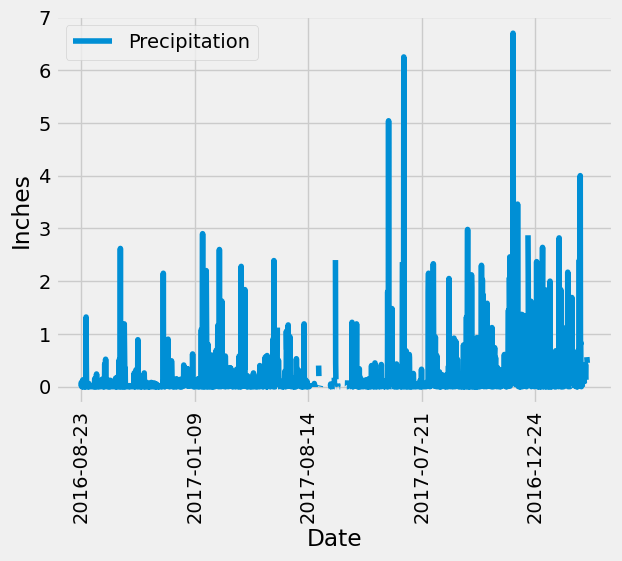

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(prior_year)


# Perform a query to retrieve the data and precipitation scores

precip_query = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= prior_year).all()

#print(precip_query)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_data = [{"Date": result[0], "Precipitation": result[1]} for result in precip_query]

precip_df = pd.DataFrame(precip_data)

# Sort the dataframe by date

precip_df.sort_values(by=["Date"], ascending=True)
#print(precip_df)

# Use Pandas Plotting with Matplotlib to plot the data

x_label = "Date"
y_label = "Inches"
precip_df.plot(x="Date", y="Precipitation", xlabel=x_label, ylabel=y_label)
plt.xticks(rotation=90)
plt.show()


In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data

precip_mean = precip_df["Precipitation"].mean()
#print(precip_mean)
precip_median = precip_df["Precipitation"].median()
#print(precip_median)
precip_variance = precip_df["Precipitation"].var()
#print(precip_variance)
precip_stdev = precip_df["Precipitation"].std()
#print(precip_stdev)
precip_sem = precip_df["Precipitation"].sem()
#print(precip_sem)

precip_summary_stats = pd.DataFrame({
    "Mean Precipitation (inches)": precip_mean,
    "Median Precipitation (inches)": precip_median,
    "Precipitation Variance": precip_variance,
    "Precipitation St. Dev.": precip_stdev,
    "Precipitation Std. Err.": precip_sem
}, index=[0])

precip_summary_stats

,Mean Precipitation (inches),Median Precipitation (inches),Precipitation Variance,Precipitation St. Dev.,Precipitation Std. Err.
0,0.177279,0.02,0.212696,0.46119,0.010259


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number of stations in the dataset

columns = inspector.get_columns("Station")
for column in columns:
    print(column["name"], column["type"])

#session.query(Station.station).count()
session.query(Measurement.station).distinct().count()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


9

In [93]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#can I use group by and then sort by descending order?

sel = [Measurement.station, Measurement.date, Measurement.prcp, func.sum(Measurement.tobs), Station.name, Station.latitude, Station.longitude, Station.elevation]

measurement_station_combined = session.query(*sel).\
    filter(Measurement.station == Station.station).group_by(Measurement.station).\
        order_by(func.sum(Measurement.tobs).desc()).all()

measurement_station_combined

[('USC00519397', '2010-01-01', 0.08, 203083.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519523', '2010-01-01', 0.15, 198957.0, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', '2010-01-01', 0.15, 198652.0, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', '2010-01-01', 0.28, 196915.0, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00516128', '2010-01-01', 0.14, 185230.0, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00514830', '2010-03-01', 0.01, 164871.0, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00511918', '2010-01-01', 0.05, 141728.0, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00517948', '2010-05-03', None, 102467.0, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', '2010-01-01', 0.21, 37162.0, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [69]:
# Close Session
session.close()